## Rk4 Algorithm:

Suppose the equation is in the form
$$ \dot y = f(t)y $$

Then
$$y_{n+1} = y_n\left(1+ h\frac{l_1+2l_2+2l_3+l_4}{6} \right)$$
with
$$
\begin{split}
l_1 &= f(t_n) \\
l_2 &= f(t_n+h/2) (1+h l_1 /2) \\
l_3 &= f(t_n+h/2) (1+h l_2/2) \\
l_4 &= f(t_n+h) (1+h l_3) \\
\end{split}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import heisenberg
from scipy.linalg import expm

## Test 1: Scalar function

$$\dot y = f(t) y$$
which implies
$$y(t) = y(0) e^{\int_0^t dt f(t)} $$

In [2]:
def g(t):
    return np.sin(t)

def f(t, y):
    return g(t) * y


def analytic(t, y0):
    return y0 * np.exp(1.-np.cos(t))

duration = 10.0
y_0 = 1.

In [3]:
sampling = heisenberg.ConstantSampling(duration, 20)

class Hamiltonian(heisenberg.BaseHamiltonian):
    def __init__(self, dim):
        super().__init__(dim)
    def sample(self, t):
        return 1j * np.ones((1, self.dim, self.dim)) * g(t)[:, None, None]  # Multiply by 1j as integrator expects S-Eqn form.

h = Hamiltonian(dim = 1)

In [4]:
unitaries = heisenberg.rk4_unitaries(sampling, h)
evo_states = heisenberg.propagate(np.array([[y_0]]), unitaries).flatten()

(20, 1, 1) (1, 1, 1) (20, 1, 1)


In [6]:
print(np.imag(evo_states))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/Users/jnelson/anaconda3/envs/q-env/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/jnelson/anaconda3/envs/q-env/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


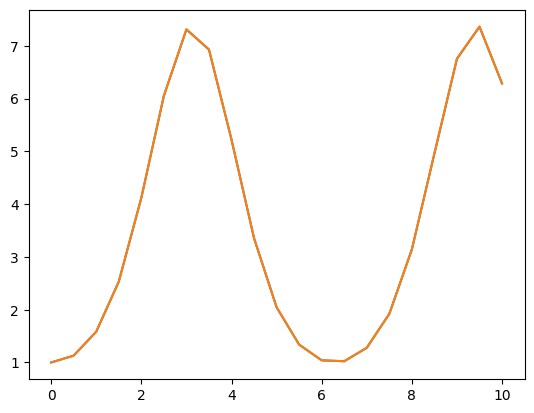

In [5]:
times = sampling.get_grid()
plt.plot(times, evo_states)
plt.plot(times, analytic(times, y_0))
plt.show()

## Test 2: Constant Hamiltonian

In [11]:
dim = 3
hamiltonian_mat = np.random.rand(dim, dim) + 1j * np.random.rand(dim, dim)
hamiltonian_mat += np.conj(hamiltonian_mat.T)

In [12]:
np.linalg.eig(hamiltonian_mat).eigenvalues

array([ 3.2229445 -2.81329128e-17j, -0.64099027-1.29868022e-17j,
        0.9110313 +1.24386442e-16j])

In [22]:
duration = 1.0

sampling = heisenberg.ConstantSampling(duration, 20)

class Hamiltonian(heisenberg.BaseHamiltonian):
    def __init__(self, dim):
        super().__init__(dim)
    def sample(self, t):
        return hamiltonian_mat[None, :] * np.ones(len(t))[:, None, None]

h = Hamiltonian(dim = dim)

In [23]:
initial_state = np.array([[1.0], [0.0], [0.0]])

In [24]:
unitaries = heisenberg.rk4_unitaries(sampling, h)
evo_states = heisenberg.propagate(initial_state, unitaries)
evo_states

(20, 3, 3) (1, 3, 3) (20, 3, 3)


array([[[ 1.        +0.j        ],
        [ 0.        +0.j        ],
        [ 0.        +0.j        ]],

       [[ 0.99598704-0.03078096j],
        [-0.00593154-0.01154245j],
        [ 0.02928102-0.07769481j]],

       [[ 0.98404148-0.0604224j ],
        [-0.01596118-0.02326359j],
        [ 0.04854988-0.1576652j ]],

       [[ 0.96444063-0.08781453j],
        [-0.03006939-0.03445345j],
        [ 0.05754389-0.23820197j]],

       [[ 0.93763871-0.1119063j ],
        [-0.04811889-0.04441256j],
        [ 0.05627494-0.31757769j]],

       [[ 0.90425521-0.13173275j],
        [-0.06985784-0.05247083j],
        [ 0.04502878-0.39409106j]],

       [[ 0.86505886-0.14644034j],
        [-0.094926  -0.05800571j],
        [ 0.0243574 -0.46611061j]],

       [[ 0.8209479 -0.15530918j],
        [-0.12286381-0.06045905j],
        [-0.00493567-0.53211649j]],

       [[ 0.77292693-0.15777193j],
        [-0.15312393-0.05935241j],
        [-0.04181646-0.59073953j]],

       [[ 0.72208105-0.15342873j],
  

In [32]:
def exact_sol(initial_state, times):
    return np.array([expm(-1j * hamiltonian_mat * t) @ initial_state for t in times])

exact_evo = exact_sol(initial_state, sampling.get_grid())
exact_probs = np.real(np.conj(exact_evo) * exact_evo)

In [34]:
probs = np.real(np.conj(evo_states) * evo_states)

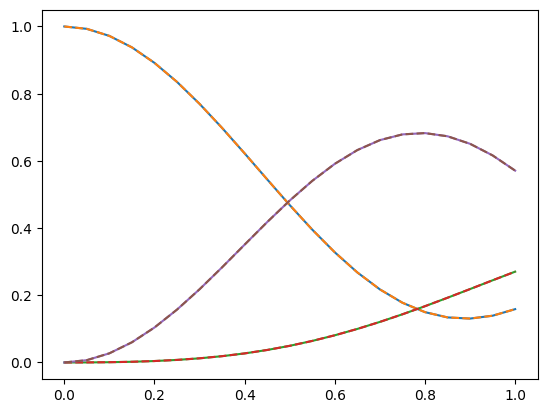

In [37]:
times = sampling.get_grid()

plt.plot(times, probs[:, 0, 0])
plt.plot(times, exact_probs[:, 0, 0], ls='--')

plt.plot(times, probs[:, 1, 0])
plt.plot(times, exact_probs[:, 1, 0], ls='--')

plt.plot(times, probs[:, 2, 0])
plt.plot(times, exact_probs[:, 2, 0], ls='--')
